## Library

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
!wget https://cdn.talentsprint.com/aiml/Wise/training_set.zip
!unzip training_set.zip

--2020-09-23 14:08:10--  https://cdn.talentsprint.com/aiml/Wise/training_set.zip
Resolving cdn.talentsprint.com (cdn.talentsprint.com)... 172.105.34.236
Connecting to cdn.talentsprint.com (cdn.talentsprint.com)|172.105.34.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 935564 (914K) [application/zip]
Saving to: ‘training_set.zip’

training_set.zip    100%[===================>] 913.64K  1.11MB/s    in 0.8s    

2020-09-23 14:08:12 (1.11 MB/s) - ‘training_set.zip’ saved [935564/935564]

Archive:  training_set.zip
   creating: training_set/
   creating: training_set/aeroplane/
  inflating: training_set/aeroplane/1.jpg  
  inflating: training_set/aeroplane/10.jpg  
  inflating: training_set/aeroplane/11.jpg  
  inflating: training_set/aeroplane/12.jpg  
  inflating: training_set/aeroplane/13.jpg  
  inflating: training_set/aeroplane/14.jpg  
  inflating: training_set/aeroplane/15.jpg  
  inflating: training_set/aeroplane/16.jpg  
  inflating: training_set/aero

## Creating Training Path

In [3]:
train_path = "training_set"
class_names = os.listdir(train_path)

In [4]:
class_names

['bicycle', 'car', 'aeroplane']

## Function to list all filenames in the directory

In [5]:
image_paths = []
image_classes = []

In [6]:
def img_list(path):
    return (os.path.join(path, f) for f in os.listdir(path))

In [7]:
for training_name in class_names:
    dir_ = os.path.join(train_path, training_name)
    class_path = img_list(dir_)
    image_paths += class_path

In [9]:
len(image_paths)
image_paths

['training_set/bicycle/7.jpg',
 'training_set/bicycle/14.JPG',
 'training_set/bicycle/11.jpg',
 'training_set/bicycle/9.jpg',
 'training_set/bicycle/12.jpg',
 'training_set/bicycle/10.jpg',
 'training_set/bicycle/17.jpg',
 'training_set/bicycle/2.jpg',
 'training_set/bicycle/16.jpg',
 'training_set/bicycle/6.jpg',
 'training_set/bicycle/8.JPG',
 'training_set/bicycle/4.png',
 'training_set/bicycle/5.jpg',
 'training_set/bicycle/3.jpg',
 'training_set/bicycle/1.jpg',
 'training_set/bicycle/13.jpg',
 'training_set/bicycle/15.png',
 'training_set/car/7.jpg',
 'training_set/car/11.jpg',
 'training_set/car/2.jpeg',
 'training_set/car/9.jpg',
 'training_set/car/15.jpg',
 'training_set/car/14.jpg',
 'training_set/car/12.jpg',
 'training_set/car/10.jpg',
 'training_set/car/17.jpg',
 'training_set/car/16.jpg',
 'training_set/car/6.jpg',
 'training_set/car/5.jpg',
 'training_set/car/3.jpg',
 'training_set/car/4.jpg',
 'training_set/car/1.jpg',
 'training_set/car/13.jpg',
 'training_set/car/8.jpg

In [17]:
image_classes_0 = [0]*(len(image_paths)//3)

In [18]:
image_classes_1 = [1]*(len(image_paths)//3)

In [19]:
image_classes_2 = [2]*(len(image_paths)//3)

In [20]:
image_classes = image_classes_0 + image_classes_1 + image_classes_2

## Append all the image path and its corresponding labels in a list

In [21]:
D = []

In [22]:
for i in range(len(image_paths)):
    D.append((image_paths[i],image_classes[i]))

In [25]:
print(*D, sep='\n')

('training_set/bicycle/7.jpg', 0)
('training_set/bicycle/14.JPG', 0)
('training_set/bicycle/11.jpg', 0)
('training_set/bicycle/9.jpg', 0)
('training_set/bicycle/12.jpg', 0)
('training_set/bicycle/10.jpg', 0)
('training_set/bicycle/17.jpg', 0)
('training_set/bicycle/2.jpg', 0)
('training_set/bicycle/16.jpg', 0)
('training_set/bicycle/6.jpg', 0)
('training_set/bicycle/8.JPG', 0)
('training_set/bicycle/4.png', 0)
('training_set/bicycle/5.jpg', 0)
('training_set/bicycle/3.jpg', 0)
('training_set/bicycle/1.jpg', 0)
('training_set/bicycle/13.jpg', 0)
('training_set/bicycle/15.png', 0)
('training_set/car/7.jpg', 1)
('training_set/car/11.jpg', 1)
('training_set/car/2.jpeg', 1)
('training_set/car/9.jpg', 1)
('training_set/car/15.jpg', 1)
('training_set/car/14.jpg', 1)
('training_set/car/12.jpg', 1)
('training_set/car/10.jpg', 1)
('training_set/car/17.jpg', 1)
('training_set/car/16.jpg', 1)
('training_set/car/6.jpg', 1)
('training_set/car/5.jpg', 1)
('training_set/car/3.jpg', 1)
('training_set/c

## Shuffle Dataset and split into Training and Testing

In [26]:
dataset = D
random.shuffle(dataset)
train = dataset[:40]
test = dataset[40:]

image_paths, y_train = zip(*train)
image_paths_test, y_test = zip(*test)

## Feature Extraction using ORB

In [27]:
des_list = []

In [28]:
orb = cv2.ORB_create()

In [29]:
im = cv2.imread(image_paths[1])

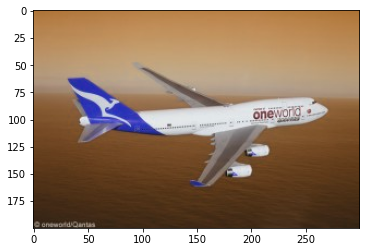

In [30]:
plt.imshow(im)

## Function for plotting keypoints

In [31]:
def draw_keypoints(vis, keypoints, color = (255, 255, 0)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

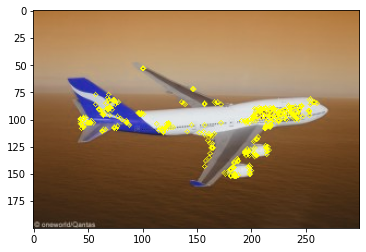

In [32]:
kp = orb.detect(im, None)
kp, des = orb.compute(im, kp)
img = draw_keypoints(im, kp)

In [48]:
des_list[0][1]

array([[ 24, 148,  62, ...,  64,  37,  83],
       [ 95,  52, 233, ..., 245, 176, 117],
       [154,  95,  70, ..., 181,  47,  95],
       ...,
       [177,  93,  53, ..., 184, 208,  40],
       [ 90, 153, 130, ...,  77, 185,  26],
       [ 66, 143,  45, ...,  72, 149,  75]], dtype=uint8)

## Appending descriptors of the training images in list

In [36]:
for image_pat in image_paths:
    im = cv2.imread(image_pat)
    kp = orb.detect(im,None)
    keypoints, descriptor= orb.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [49]:
descriptors = des_list[0][1]

for image_path, descriptor in des_list[1:]:
    descriptors = np.vstack((descriptors,descriptor))

In [50]:
descriptors.shape

(16499, 32)

In [51]:
descriptors_float = descriptors.astype(float)

## Performing K means Clustering on Descriptors

In [52]:
from scipy.cluster.vq import kmeans, vq

In [89]:
k = 200
voc, variance = kmeans(descriptors_float, k, 1)

## Creating Histograms of training image

In [90]:
im_features = np.zeros((len(image_paths), k), "float32")

for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1], voc)
#     print(words)
    for w in words:
        im_features[i][w]+=1

(array([[30.,  7.,  3., ...,  0.,  0.,  0.],
        [33.,  6.,  0., ...,  0.,  0.,  0.],
        [28.,  8.,  4., ...,  0.,  0.,  0.],
        ...,
        [35.,  4.,  0., ...,  0.,  0.,  0.],
        [29.,  9.,  2., ...,  0.,  0.,  0.],
        [30.,  6.,  2., ...,  0.,  0.,  0.]]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ],
       dtype=float32),
 <a list of 200 Lists of Patches objects>)

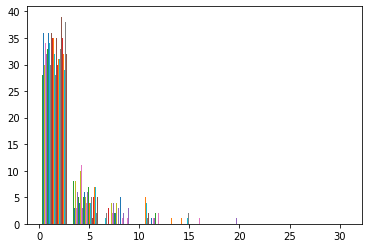

In [91]:
plt.hist(im_features)

## Applying Standardization on training image

In [ ]:
from sklearn.preprocessing import StandardScaler
stdslr = StandardScaler().fit(im_features)
im_features = stdslr.transform(im_features)

## Creating Classification model with SVM

In [93]:
from sklearn.svm import LinearSVC

clf = LinearSVC(max_iter=80000)
clf.fit(im_features, np.array(y_train))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=80000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Testing the Classification Model

In [94]:
des_list_test=[]

In [95]:
for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=orb.detect(image,None)
    keypoints_test,descriptor_test= orb.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))

In [96]:
len(image_paths_test)

11

In [97]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [98]:
test_features

array([[ 4.,  1.,  2., ...,  0.,  2.,  7.],
       [ 5.,  0.,  3., ...,  1., 12.,  0.],
       [ 1.,  3.,  1., ...,  6.,  1.,  2.],
       ...,
       [ 3.,  0.,  0., ...,  0.,  6.,  2.],
       [ 0.,  2.,  0., ...,  0., 12.,  0.],
       [ 3.,  1.,  2., ...,  1.,  2.,  0.]], dtype=float32)

(array([[3., 5., 1., ..., 0., 0., 0.],
        [5., 4., 2., ..., 0., 0., 0.],
        [3., 5., 3., ..., 0., 0., 0.],
        ...,
        [5., 3., 1., ..., 0., 0., 0.],
        [1., 6., 0., ..., 2., 0., 0.],
        [5., 2., 2., ..., 0., 0., 0.]]),
 array([-1.4004031 , -0.619873  ,  0.16065721,  0.9411874 ,  1.7217176 ,
         2.5022478 ,  3.282778  ,  4.0633082 ,  4.843838  ,  5.6243687 ,
         6.4048986 ], dtype=float32),
 <a list of 200 Lists of Patches objects>)

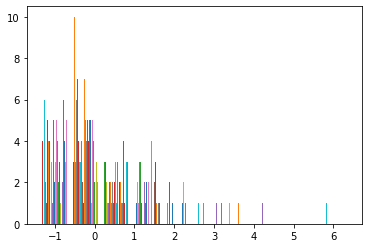

In [99]:
test_features = stdslr.transform(test_features)
plt.hist(test_features)

In [114]:
true_test_classes = []
for i in y_test:
    if i==0:
        true_test_classes.append("Bicycle")
    elif i==1:
        true_test_classes.append("Car")
    else:
        true_test_classes.append("Aeroplane")

In [118]:
predict_test_classes = []
for i in clf.predict(test_features):
    if i==0:
        predict_test_classes.append("Bicycle")
    elif i==1:
        predict_test_classes.append("Car")
    else:
        predict_test_classes.append("Aeroplane")

In [116]:
print(true_test_classes)

['Aeroplane', 'Bicycle', 'Aeroplane', 'Bicycle', 'Car', 'Bicycle', 'Aeroplane', 'Car', 'Bicycle', 'Bicycle', 'Bicycle']


In [119]:
print(predict_test_classes)

['Bicycle', 'Bicycle', 'Aeroplane', 'Bicycle', 'Car', 'Bicycle', 'Aeroplane', 'Car', 'Bicycle', 'Bicycle', 'Bicycle']


In [120]:
true_train_classes = []
for i in y_train:
    if i==0:
        true_train_classes.append("Bicycle")
    elif i==1:
        true_train_classes.append("Car")
    else:
        true_train_classes.append("Aeroplane")

In [121]:
predict_train_classes = []
for i in clf.predict(im_features):
    if i==0:
        predict_train_classes.append("Bicycle")
    elif i==1:
        predict_train_classes.append("Car")
    else:
        predict_train_classes.append("Aeroplane")

In [122]:
print(true_train_classes)

['Bicycle', 'Aeroplane', 'Car', 'Bicycle', 'Aeroplane', 'Car', 'Aeroplane', 'Bicycle', 'Aeroplane', 'Car', 'Bicycle', 'Aeroplane', 'Car', 'Bicycle', 'Car', 'Bicycle', 'Aeroplane', 'Car', 'Aeroplane', 'Aeroplane', 'Car', 'Aeroplane', 'Bicycle', 'Car', 'Car', 'Bicycle', 'Aeroplane', 'Car', 'Bicycle', 'Car', 'Aeroplane', 'Car', 'Bicycle', 'Car', 'Car', 'Aeroplane', 'Aeroplane', 'Bicycle', 'Car', 'Aeroplane']


In [123]:
print(predict_train_classes)

['Bicycle', 'Aeroplane', 'Car', 'Bicycle', 'Aeroplane', 'Car', 'Aeroplane', 'Bicycle', 'Aeroplane', 'Car', 'Bicycle', 'Aeroplane', 'Car', 'Bicycle', 'Car', 'Bicycle', 'Aeroplane', 'Car', 'Aeroplane', 'Aeroplane', 'Car', 'Aeroplane', 'Bicycle', 'Car', 'Car', 'Bicycle', 'Aeroplane', 'Car', 'Bicycle', 'Car', 'Aeroplane', 'Car', 'Bicycle', 'Car', 'Car', 'Aeroplane', 'Aeroplane', 'Bicycle', 'Car', 'Aeroplane']


In [124]:
test_accuracy = accuracy_score(true_test_classes, predict_test_classes)
train_accuracy = accuracy_score(true_train_classes, predict_train_classes)
print(f"Testing accuracy: {test_accuracy*100}")
print(f"Training accuracy: {train_accuracy*100}")

Testing accuracy: 90.9090909090909
Training accuracy: 100.0
